<a href="https://colab.research.google.com/github/ElfiraAulia/UAS-KUANTUM/blob/main/Clustering_Kuantum_13559_Elfira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from skimage.feature import hog

In [3]:
df = pd.DataFrame({'image_path': sorted(glob.glob('/content/drive/MyDrive/Clustering/segmentation data.csv'))})
df['class'] = df['image_path'].apply(lambda x: x.split('/')[-2])
df.head()

,image_path,class
0,/content/drive/MyDrive/Clustering/segmentation...,Clustering


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Clustering/segmentation data.csv')
test_df=pd.read_excel('/content/drive/MyDrive/Clustering/segmentation data legend.xlsx')

In [5]:
test_df

,Unnamed: 0,Segmentation data - Legend,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,The dataset consists of information about the ...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Variable,Data type,Range,Description
3,NaN,ID,numerical,Integer,Shows a unique identificator of a customer.
4,NaN,NaN,NaN,NaN,NaN
5,NaN,Sex,categorical,"{0,1}",Biological sex (gender) of a customer. In this...
6,NaN,NaN,NaN,0,male
7,NaN,NaN,NaN,1,female
8,NaN,NaN,NaN,NaN,NaN
9,NaN,Marital status,categorical,"{0,1}",Marital status of a customer.


In [6]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [7]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [8]:
df.duplicated().sum()

0

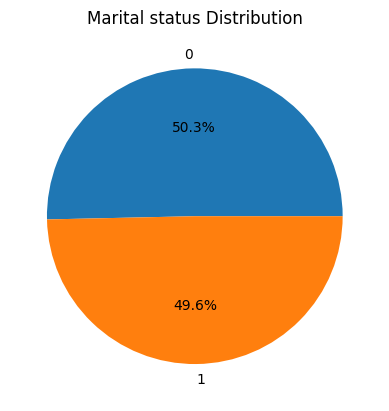

In [9]:
plt.pie(df['Marital status'].value_counts(),labels=df['Marital status'].unique(), autopct='%1.1f%%')
plt.title("Marital status Distribution")
plt.show()

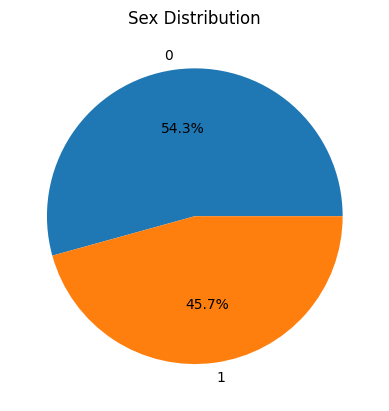

In [10]:
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].unique(), autopct='%1.1f%%')
plt.title("Sex Distribution")
plt.show()

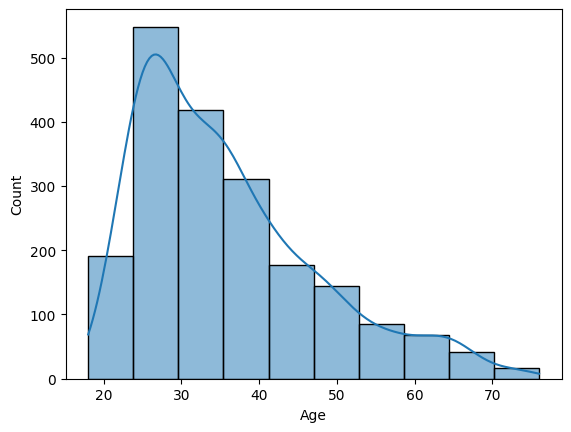

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt # Assuming you want to keep the plt.show()

sns.histplot(df['Age'],kde=True,bins=10)
plt.show()

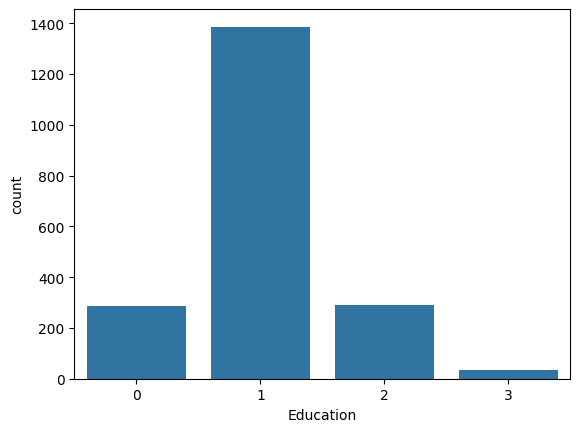

In [13]:
sns.countplot(x='Education',data=df)
plt.show()

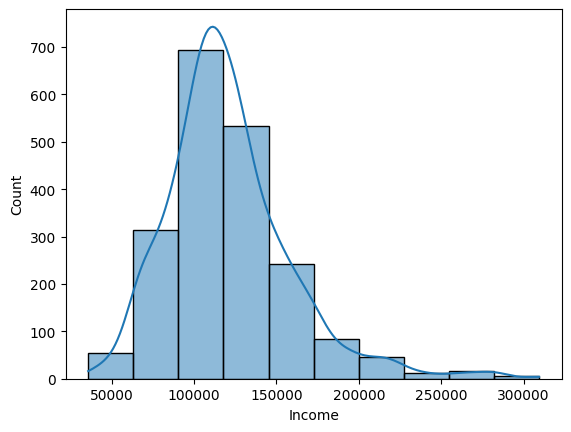

In [14]:
sns.histplot(df['Income'],bins=10,kde=True)
plt.show()

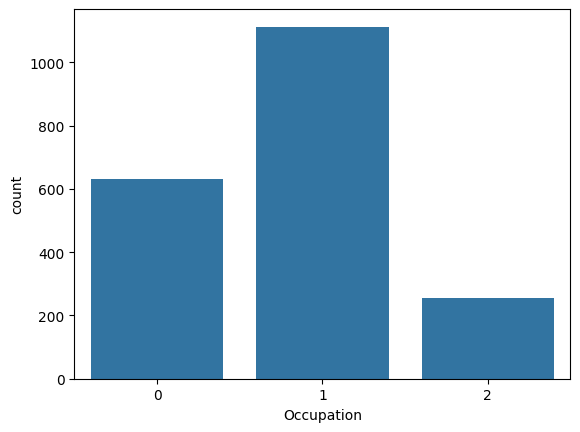

In [15]:
sns.countplot(x='Occupation',data=df)
plt.show()

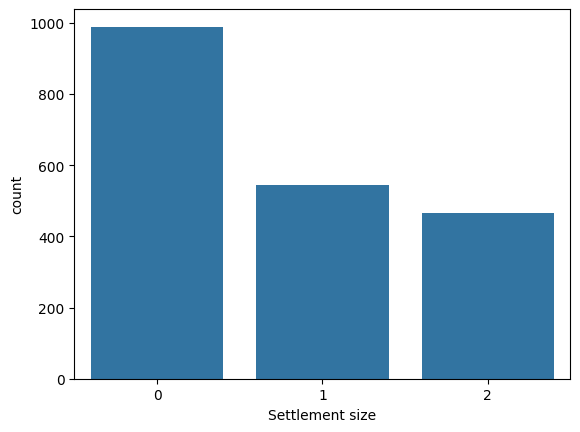

In [16]:
sns.countplot(x='Settlement size',data=df)
plt.show()

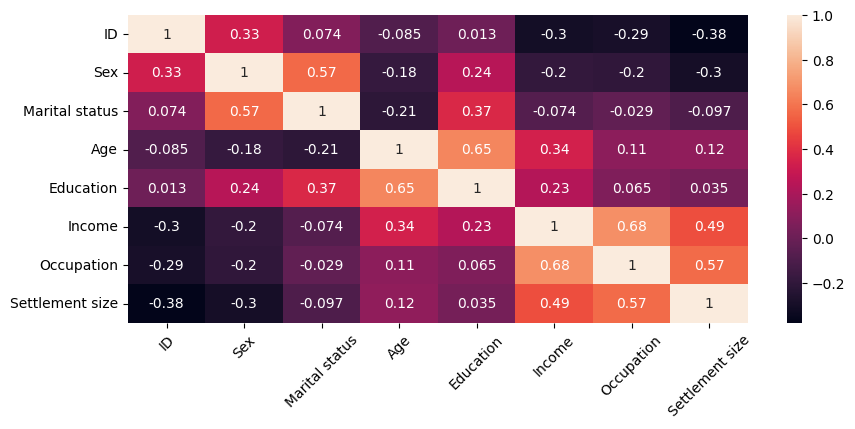

In [17]:
plt.subplots(figsize=(10, 4))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

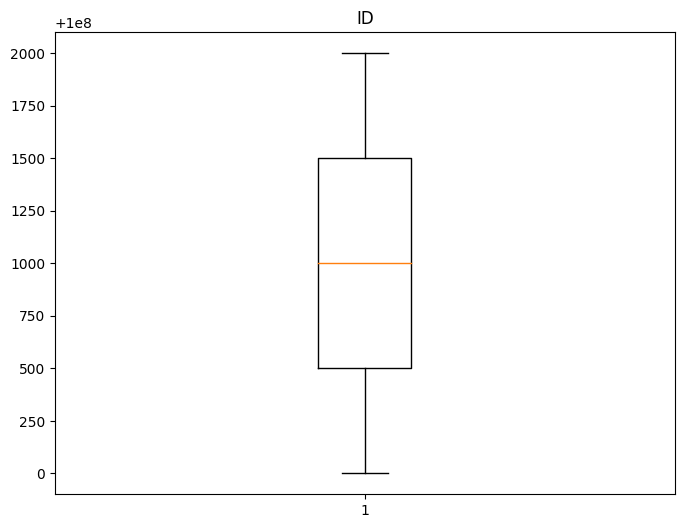

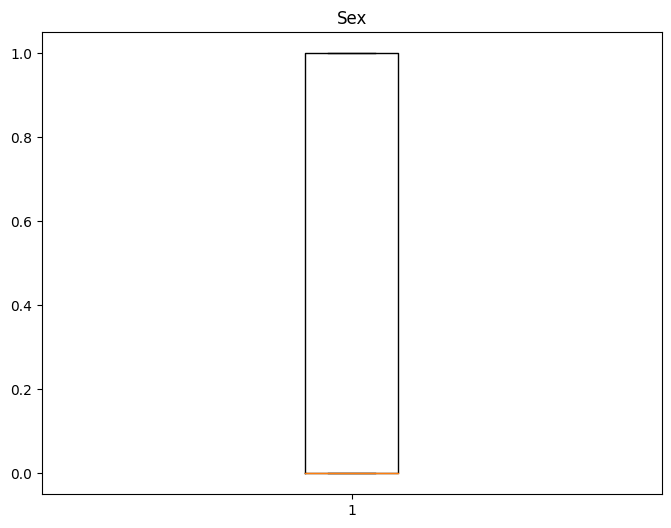

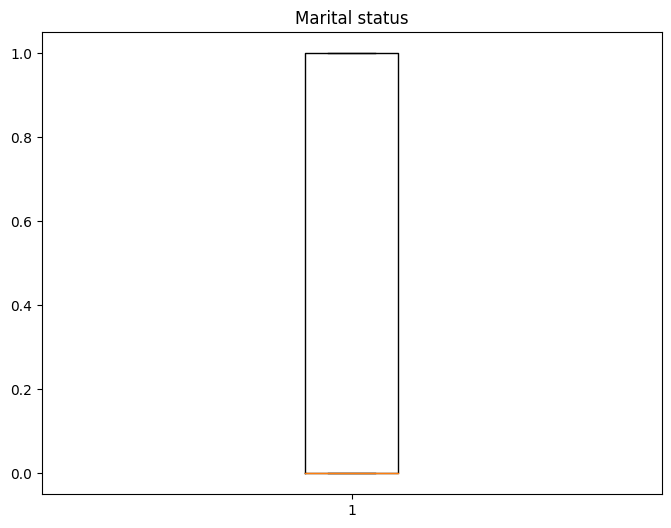

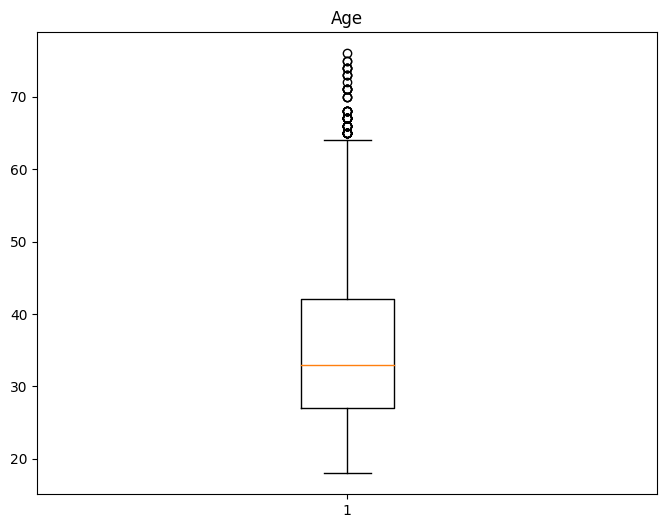

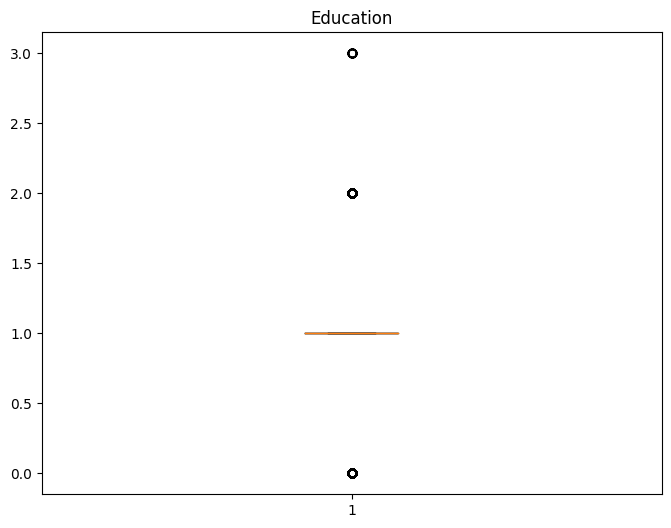

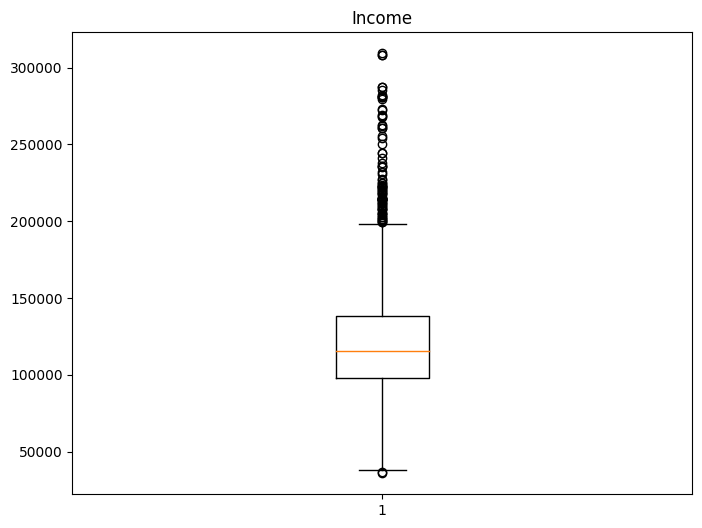

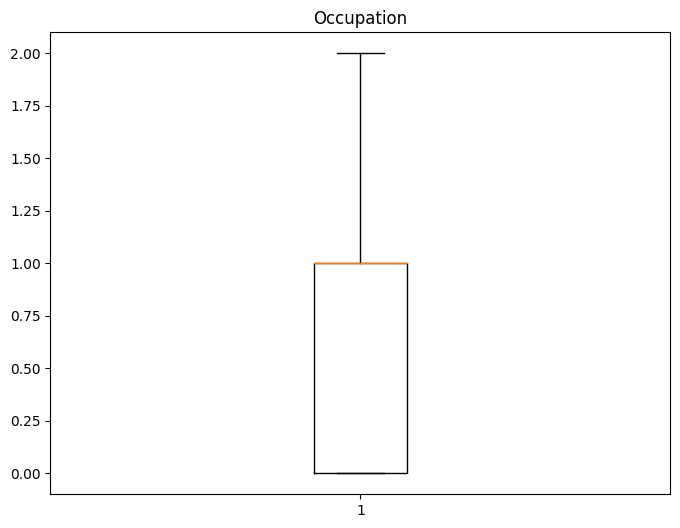

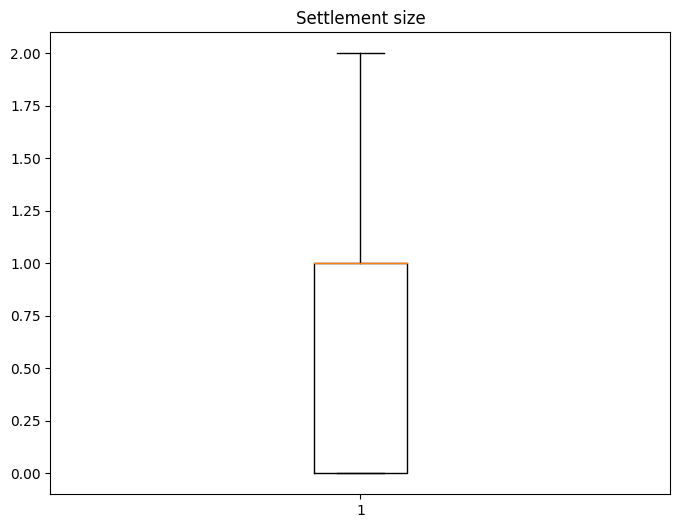

In [18]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'{col}')
    plt.show()

In [19]:
wcss = []
for i in range(1, 11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [20]:
wcss

[2903779699148.642,
 1215199137490.1978,
 673659170761.699,
 377732495069.43365,
 249589875461.80432,
 177220364917.74838,
 130146609028.79007,
 96969120879.74664,
 79209147318.64284,
 65099655874.72635]

In [22]:
!pip install plotly
import plotly.express as px

graph = px.line(x=range(1,11), y=wcss)
graph.show()

In [23]:
kmean_clusters = KMeans(n_clusters=3, random_state=0)
colors = kmean_clusters.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [24]:
graph1 = px.scatter(x='Age', y='Income', color=colors, data_frame=df)
graph1.show()

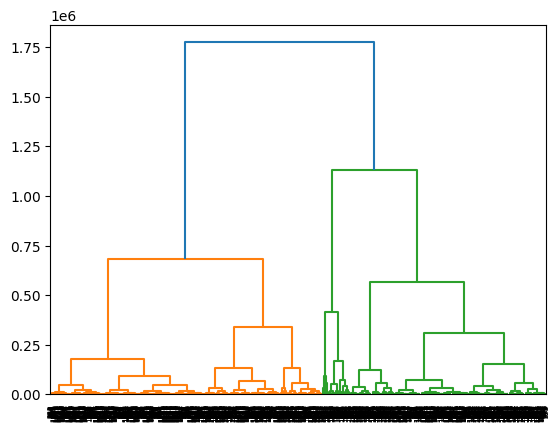

In [25]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
data=sch.linkage(df,method='ward')
dendrogram=sch.dendrogram(data)

In [26]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
colors2 = hc.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [27]:
graph2 = px.scatter(x='Age', y='Income', color=colors2, data_frame=df)
graph2.show()

In [28]:
for r in range(1,50):
    for m in range(4,100):
        from sklearn.cluster import DBSCAN
        dbs=DBSCAN(eps=r,min_samples=m)
        df["dbs_clusters"]=dbs.fit_predict(df)
    if df["dbs_clusters"].nunique()== 3:
            break
print("eps",r)
print("min",m)

eps 49
min 99


In [29]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=49, min_samples=99)
dbs.fit(df)

DBSCAN(eps=49, min_samples=99)

In [30]:
colors3 = dbs.fit_predict(df)

In [31]:
graph3 = px.scatter(x='Age', y='Income', color=colors3, data_frame=df)
graph3.show()